In [16]:
%matplotlib inline 

import numpy as np
import scipy
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
from mpl_toolkits.mplot3d import Axes3D #3D plotting
import datetime as dt # module for manipulating dates and times

import requests 
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import binom
from __future__ import division
import re
from StringIO import StringIO
from zipfile import ZipFile 
from pandas import read_csv
from urllib import urlopen
import urllib2
import json

import sklearn
import sklearn.preprocessing
import sklearn.datasets

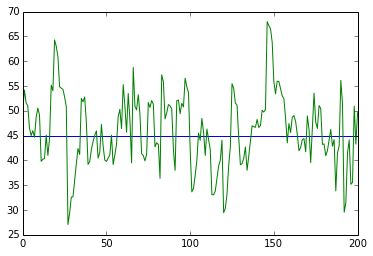

In [47]:
# LMSR Implementation Das Interpretation

iterations = 201
trial = np.zeros(100)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMb = 125
    MMquantity = np.zeros(iterations)
    MMquantity[0] = 0
    MMprice = np.zeros(iterations)
    MMprice[0] = 50
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue > 100:
            traderValue = 99.99
        quantityTrader = np.random.exponential(traderAlphaExponential)
        if traderValue < MMprice[time - 1]:
            quantityTrader = -quantityTrader
        currentquantity = np.sum(MMquantity)
        MMquantity[time] = quantityTrader 
        newquantity = quantityTrader + currentquantity
        MMrevenue[time] = 100*MMb*(np.log(1+np.exp(newquantity/MMb))- \
                                   np.log(1+np.exp(currentquantity/MMb)))
        MMprice[time] = 100*(np.exp(newquantity/MMb)/(1+np.exp(newquantity/MMb)))
    trial[i] = np.sum(MMrevenue)
xs = np.arange(0,iterations,1)
plt.plot(xs, trueValue, xs, MMprice)

498.114453434
4378.43196509
-6834.68264244


(array([  6.,  18.,  23.,  22.,  14.,   6.,   3.,   1.,   6.,   1.]),
 array([ -6834.68264244,  -4714.53654319,  -2594.39044393,   -474.24434467,
          1645.90175458,   3766.04785384,   5886.19395309,   8006.34005235,
         10126.48615161,  12246.63225086,  14366.77835012]),
 <a list of 10 Patch objects>)

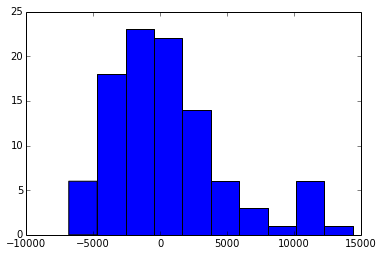

In [48]:
# Revenue Results 
print(np.average(trial))
print(np.std(trial))
print(np.min(trial))
plt.hist(trial)

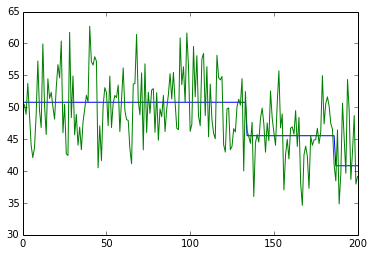

In [45]:
# LMSR Implementation Textbook Interpretation
iterations = 201
trial = np.zeros(101)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMb = 125
    MMquantity = np.zeros(iterations)
    MMquantity[0] = 0
    MMprice = np.zeros(iterations)
    MMprice[0] = 50
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue >= 100:
            traderValue = 99.99   
        # will trade till the instantaneous price is equal to trader's value 
        currentquantity = np.sum(MMquantity) 
        quantityTrader = np.log((traderValue/100)/(1-(traderValue/100)))*MMb-currentquantity
        MMquantity[time] = quantityTrader
        newquantity = quantityTrader + currentquantity
        MMrevenue[time] = 100*MMb*(np.log(1+np.exp(newquantity/MMb))- \
                                   np.log(1+np.exp(currentquantity/MMb)))
        
        MMprice[time] = 100*(np.exp(newquantity/MMb)/(1+np.exp(newquantity/MMb)))
    trial[i] = np.sum(MMrevenue)
xs = np.arange(0,iterations,1)
plt.plot(xs, trueValue, xs, MMprice)


1004.41318099
4247.19188667
-5633.88528894


(array([ 15.,  31.,  29.,  16.,   6.,   2.,   0.,   0.,   1.,   1.]),
 array([ -5.63388529e+03,  -2.82232902e+03,  -1.07727515e+01,
          2.80078352e+03,   5.61233979e+03,   8.42389605e+03,
          1.12354523e+04,   1.40470086e+04,   1.68585649e+04,
          1.96701211e+04,   2.24816774e+04]),
 <a list of 10 Patch objects>)

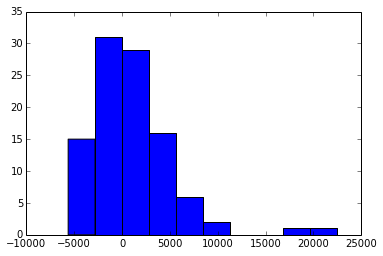

In [46]:
print(np.average(trial))
print(np.std(trial))
print(np.min(trial))
plt.hist(trial)

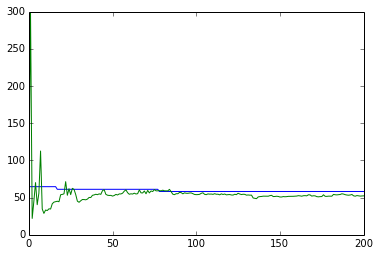

In [60]:
#Liquidity Sensitive LMSR Implementation Das Interpretation

iterations = 201
trial = np.zeros(100)

for i in np.arange(0,100,1):
    # Initialize Market Model
    initialValue = np.random.normal(50,12)
    if initialValue < 0:
        initialValue = 0
    if initialValue > 100:
        initialValue = 100

    # shock values
    shock_prob= 1/100
    shockSD = 5
    # true asset value
    trueValue = np.zeros(iterations)
    trueValue[0] = initialValue

    # Initial Trade Values
    traderAlphaExponential = 20
    traderSD = 5
    traderValueAll = np.zeros(iterations)
    traderValueAll[0] = initialValue
    
    #initial MM values
    MMquantity = np.zeros(iterations)
    MMquantity[0] = 10
    MMprice = np.zeros(iterations)
    MMprice[0] = 50
    MMrevenue = np.zeros(iterations)
    MMrevenue[0] = 0
    alpha = 0.05
    
    for time in np.arange(1,iterations,1):
        if np.random.binomial(1,shock_prob) == 1:
            initialValue = initialValue + np.random.normal(0, shockSD)
        trueValue[time] = initialValue
        traderValue = np.random.normal(initialValue, traderSD)
        traderValueAll[time] = traderValue
        if traderValue <= 0:
            traderValue = 0.01
        if traderValue > 100:
            traderValue = 99.99
        quantityTrader = np.random.exponential(traderAlphaExponential)
        if traderValue < MMprice[time - 1]:
            quantityTrader = -quantityTrader
        currentquantity = np.sum(MMquantity)
        totalquantity = np.sum(np.abs(MMquantity))
        MMb = alpha*totalquantity
        MMquantity[time] = quantityTrader     
        newquantity = quantityTrader + currentquantity
        MMrevenue[time] = 100*MMb*(np.log(1+np.exp(newquantity/MMb))- \
                                   np.log(1+np.exp(currentquantity/MMb)))
        MMprice[time] = 100*(alpha*np.log(1+np.exp(newquantity/MMb)))
    trial[i] = np.sum(MMrevenue)
xs = np.arange(0,iterations,1)
plt.plot(xs, trueValue, xs, MMprice)

182642.330264
55730.5014102
14428.8905278


(array([  1.,   3.,   0.,  17.,  19.,  23.,  13.,  16.,   6.,   2.]),
 array([  14428.89052776,   45038.60184665,   75648.31316554,
         106258.02448443,  136867.73580332,  167477.44712221,
         198087.15844111,  228696.86976   ,  259306.58107889,
         289916.29239778,  320526.00371667]),
 <a list of 10 Patch objects>)

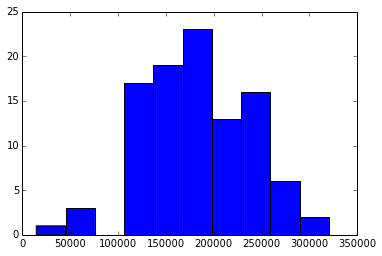

In [61]:
print(np.average(trial))
print(np.std(trial))
print(np.min(trial))
plt.hist(trial)